<a href="https://colab.research.google.com/github/lalitha-sahitya/Public-Transport-Delays-Prediction/blob/main/Public_Transport_Delays_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np

In [4]:
od.download('https://www.kaggle.com/datasets/khushikyad001/public-transport-delays-with-weather-and-events')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kdjf
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/khushikyad001/public-transport-delays-with-weather-and-events


100%|██████████| 63.9k/63.9k [00:00<00:00, 162MB/s]

In [5]:
os.listdir('public-transport-delays-with-weather-and-events')

['public_transport_delays.csv']

In [6]:
data=pd.read_csv('public-transport-delays-with-weather-and-events/public_transport_delays.csv')

In [7]:
data.head()

,trip_id,date,time,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,...,wind_speed_kmh,precipitation_mm,event_type,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed
0,T00000,2023-01-01,05:00:00,Tram,Route_15,Station_31,Station_6,05:02:00,05:55:00,12,...,46,13.0,NaN,500,81,0,1,6,Winter,0
1,T00001,2023-01-01,05:15:00,Metro,Route_12,Station_49,Station_32,05:16:00,05:55:00,15,...,11,11.4,NaN,0,53,0,0,6,Autumn,1
2,T00002,2023-01-01,05:30:00,Bus,Route_16,Station_29,Station_42,05:33:00,06:17:00,0,...,31,14.1,Sports,0,67,1,0,6,Autumn,0
3,T00003,2023-01-01,05:45:00,Tram,Route_19,Station_26,Station_18,05:49:00,06:08:00,15,...,41,6.4,NaN,500,84,0,0,6,Winter,1
4,T00004,2023-01-01,06:00:00,Tram,Route_8,Station_18,Station_15,06:00:00,06:35:00,-1,...,30,18.5,NaN,500,46,0,0,6,Spring,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   trip_id                     2000 non-null   object 
 1   date                        2000 non-null   object 
 2   time                        2000 non-null   object 
 3   transport_type              2000 non-null   object 
 4   route_id                    2000 non-null   object 
 5   origin_station              2000 non-null   object 
 6   destination_station         2000 non-null   object 
 7   scheduled_departure         2000 non-null   object 
 8   scheduled_arrival           2000 non-null   object 
 9   actual_departure_delay_min  2000 non-null   int64  
 10  actual_arrival_delay_min    2000 non-null   int64  
 11  weather_condition           2000 non-null   object 
 12  temperature_C               2000 non-null   float64
 13  humidity_percent            2000 

In [9]:
data.isnull().sum()

,0
trip_id,0
date,0
time,0
transport_type,0
route_id,0
origin_station,0
destination_station,0
scheduled_departure,0
scheduled_arrival,0
actual_departure_delay_min,0


In [10]:
data.describe()

,actual_departure_delay_min,actual_arrival_delay_min,temperature_C,humidity_percent,wind_speed_kmh,precipitation_mm,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,delayed
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,8.688000,13.318000,15.121350,64.714000,29.300500,9.860700,6420.250000,50.244000,0.089500,0.272000,2.976000,0.749500
std,6.268118,9.289727,11.479424,20.334747,17.264015,5.781373,15198.306129,29.225751,0.285535,0.445101,1.990328,0.433409
min,-2.000000,-3.000000,-5.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,5.100000,46.000000,15.000000,4.900000,0.000000,25.000000,0.000000,0.000000,1.000000,0.000000
50%,9.000000,13.000000,15.300000,65.000000,29.000000,9.700000,0.000000,50.000000,0.000000,0.000000,3.000000,1.000000
75%,14.000000,21.000000,24.800000,83.000000,45.000000,14.800000,2000.000000,76.000000,0.000000,1.000000,5.000000,1.000000
max,19.000000,29.000000,35.000000,99.000000,59.000000,20.000000,50000.000000,99.000000,1.000000,1.000000,6.000000,1.000000


In [11]:
data=data.drop(['trip_id','event_type'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        2000 non-null   object 
 1   time                        2000 non-null   object 
 2   transport_type              2000 non-null   object 
 3   route_id                    2000 non-null   object 
 4   origin_station              2000 non-null   object 
 5   destination_station         2000 non-null   object 
 6   scheduled_departure         2000 non-null   object 
 7   scheduled_arrival           2000 non-null   object 
 8   actual_departure_delay_min  2000 non-null   int64  
 9   actual_arrival_delay_min    2000 non-null   int64  
 10  weather_condition           2000 non-null   object 
 11  temperature_C               2000 non-null   float64
 12  humidity_percent            2000 non-null   int64  
 13  wind_speed_kmh              2000 

In [12]:
data.isna().sum()

,0
date,0
time,0
transport_type,0
route_id,0
origin_station,0
destination_station,0
scheduled_departure,0
scheduled_arrival,0
actual_departure_delay_min,0
actual_arrival_delay_min,0


In [19]:
data['delayed'].value_counts()

,count
delayed,
1,1499
0,501


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='delayed', ylabel='count'>

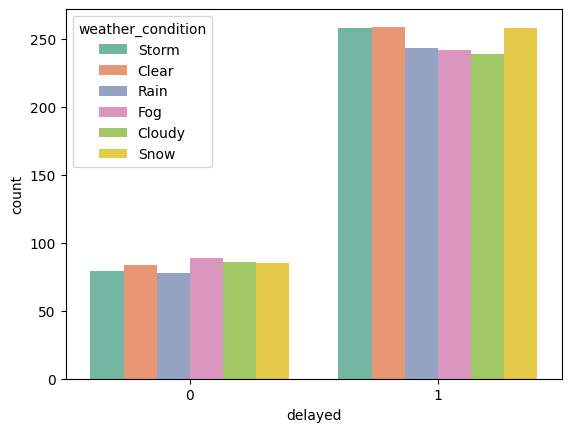

In [38]:
sns.countplot(x='delayed', hue='weather_condition', data=data, palette="Set2")

<Axes: xlabel='delayed', ylabel='count'>

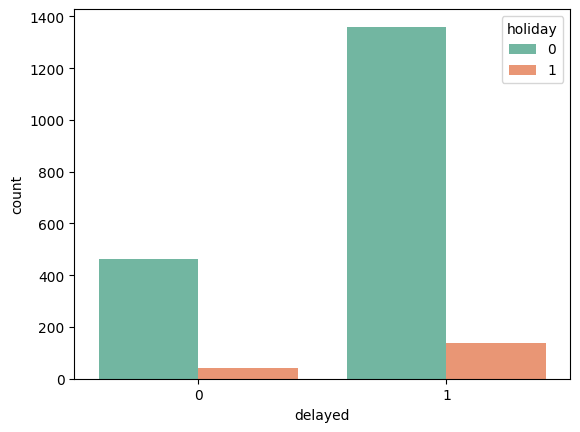

In [37]:
sns.countplot(x='delayed', hue='holiday', data=data, palette="Set2")

<Axes: xlabel='transport_type', ylabel='count'>

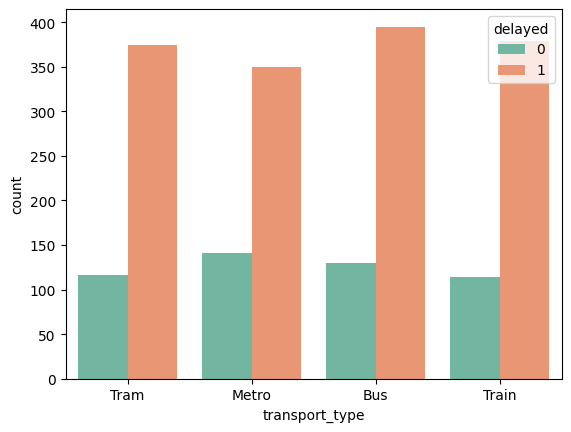

In [36]:
sns.countplot(x='transport_type', hue='delayed', data=data, palette="Set2")

<Axes: xlabel='weekday', ylabel='count'>

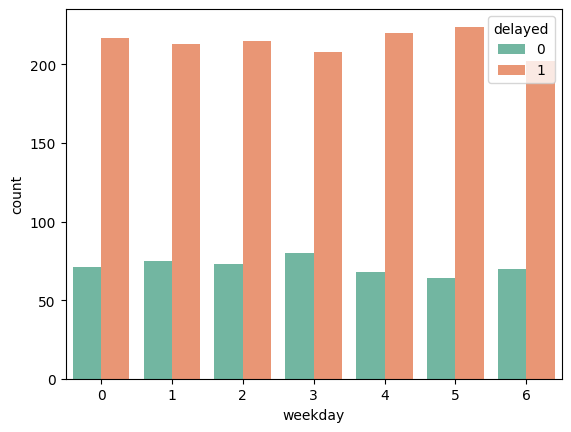

In [35]:
sns.countplot(x='weekday', hue='delayed', data=data, palette="Set2")

In [39]:
cat_cols=[i for i in data.columns if data[i].dtype=='object']
num_cols=[i for i in data.columns if data[i].dtype!="object"]

In [40]:
cat_cols

['date',
 'time',
 'transport_type',
 'route_id',
 'origin_station',
 'destination_station',
 'scheduled_departure',
 'scheduled_arrival',
 'weather_condition',
 'season']

In [41]:
num_cols

['actual_departure_delay_min',
 'actual_arrival_delay_min',
 'temperature_C',
 'humidity_percent',
 'wind_speed_kmh',
 'precipitation_mm',
 'event_attendance_est',
 'traffic_congestion_index',
 'holiday',
 'peak_hour',
 'weekday',
 'delayed']

In [42]:
for i in cat_cols:
  print(i)
  print(data[i].unique())

date
['2023-01-01' '2023-01-02' '2023-01-03' '2023-01-04' '2023-01-05'
 '2023-01-06' '2023-01-07' '2023-01-08' '2023-01-09' '2023-01-10'
 '2023-01-11' '2023-01-12' '2023-01-13' '2023-01-14' '2023-01-15'
 '2023-01-16' '2023-01-17' '2023-01-18' '2023-01-19' '2023-01-20'
 '2023-01-21' '2023-01-22']
time
['05:00:00' '05:15:00' '05:30:00' '05:45:00' '06:00:00' '06:15:00'
 '06:30:00' '06:45:00' '07:00:00' '07:15:00' '07:30:00' '07:45:00'
 '08:00:00' '08:15:00' '08:30:00' '08:45:00' '09:00:00' '09:15:00'
 '09:30:00' '09:45:00' '10:00:00' '10:15:00' '10:30:00' '10:45:00'
 '11:00:00' '11:15:00' '11:30:00' '11:45:00' '12:00:00' '12:15:00'
 '12:30:00' '12:45:00' '13:00:00' '13:15:00' '13:30:00' '13:45:00'
 '14:00:00' '14:15:00' '14:30:00' '14:45:00' '15:00:00' '15:15:00'
 '15:30:00' '15:45:00' '16:00:00' '16:15:00' '16:30:00' '16:45:00'
 '17:00:00' '17:15:00' '17:30:00' '17:45:00' '18:00:00' '18:15:00'
 '18:30:00' '18:45:00' '19:00:00' '19:15:00' '19:30:00' '19:45:00'
 '20:00:00' '20:15:00' '20:3

In [46]:
cat_cols

['date',
 'time',
 'transport_type',
 'route_id',
 'origin_station',
 'destination_station',
 'scheduled_departure',
 'scheduled_arrival',
 'weather_condition',
 'season']

In [47]:
new_cat_cols=['date','transport_type','route_id',
 'origin_station',
 'destination_station','weather_condition',
 'season']

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [50]:
for i in new_cat_cols:
  data[i]=le.fit_transform(data[i])

In [51]:
data.head()

,date,time,transport_type,route_id,origin_station,destination_station,scheduled_departure,scheduled_arrival,actual_departure_delay_min,actual_arrival_delay_min,...,humidity_percent,wind_speed_kmh,precipitation_mm,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season,delayed
0,0,05:00:00,3,6,24,46,05:02:00,05:55:00,12,3,...,52,46,13.0,500,81,0,1,6,3,0
1,0,05:15:00,1,3,43,25,05:16:00,05:55:00,15,9,...,64,11,11.4,0,53,0,0,6,0,1
2,0,05:30:00,0,7,21,36,05:33:00,06:17:00,0,0,...,35,31,14.1,0,67,1,0,6,0,0
3,0,05:45:00,3,10,18,9,05:49:00,06:08:00,15,10,...,55,41,6.4,500,84,0,0,6,3,1
4,0,06:00:00,3,18,9,6,06:00:00,06:35:00,-1,14,...,90,30,18.5,500,46,0,0,6,1,1


In [55]:
data=data.drop(['time','scheduled_departure','scheduled_arrival'],axis=1)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x=data.drop('delayed',axis=1)
y=data['delayed']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in x_train.columns:
  x_train[i]=sc.fit_transform(x_train[[i]])
  x_test[i]=sc.transform(x_test[[i]])

In [60]:
x_train.head()

,date,transport_type,route_id,origin_station,destination_station,actual_departure_delay_min,actual_arrival_delay_min,weather_condition,temperature_C,humidity_percent,wind_speed_kmh,precipitation_mm,event_attendance_est,traffic_congestion_index,holiday,peak_hour,weekday,season
968,-0.015064,0.456356,0.256407,1.495299,0.339857,-1.557960,-0.042284,0.281318,-1.240122,-1.603871,-0.269503,1.400654,-0.433186,-1.379675,-0.315684,-0.617813,-0.495011,-0.488164
240,-1.354046,0.456356,-0.096649,0.594203,-1.106342,0.522387,1.461160,1.441391,0.614470,0.016170,-1.544745,0.815767,-0.433186,1.316702,-0.315684,-0.617813,-0.994392,1.328260
819,-0.349809,-1.315899,-0.096649,1.218039,1.648322,-0.117720,-0.364451,-0.878756,0.718954,-0.671120,1.121669,1.022198,-0.433186,0.872995,-0.315684,-0.617813,-1.493773,-1.396376
692,-0.517182,-1.315899,0.785991,-0.445523,0.615323,-1.397933,1.353771,-1.458792,-0.717702,-0.720213,-1.544745,1.452262,-0.433186,-0.697048,-0.315684,-0.617813,1.502512,-1.396376
420,-1.019300,0.456356,-1.685401,0.178313,-0.486542,1.162494,-1.008784,1.441391,1.223960,0.801644,0.715910,-1.231338,-0.433186,0.361024,-0.315684,-0.617813,0.004370,0.420048


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [62]:
models=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

In [64]:
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print(accuracy_score(y_test,y_pred))
  print(precision_score(y_test,y_pred))
  print(recall_score(y_test,y_pred))
  print(f1_score(y_test,y_pred))

LogisticRegression()
0.9925
0.9965870307167235
0.9931972789115646
0.9948892674616695
DecisionTreeClassifier()
1.0
1.0
1.0
1.0
RandomForestClassifier()
1.0
1.0
1.0
1.0
SVC()
0.9775
0.973421926910299
0.9965986394557823
0.984873949579832
KNeighborsClassifier()
0.84
0.8616352201257862
0.9319727891156463
0.8954248366013072
GaussianNB()
0.995
0.9932432432432432
1.0
0.9966101694915255


In [65]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [66]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,